## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Import Dataset

data = pd.read_csv('/kaggle/input/titanic/train.csv')
print(data_train.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [5]:
dtypes = data.dtypes
dtypes = dtypes.to_frame()
dtypes.columns= ['type']

In [6]:
dtypes['type'].value_counts()

int64      5
object     5
float64    2
Name: type, dtype: int64

In [7]:
print(dtypes[dtypes['type']=='int64'])
print('----------------------------------------------------------------------------------')
print(dtypes[dtypes['type']=='object'])
print('----------------------------------------------------------------------------------')
print(dtypes[dtypes['type']=='float'])
print('----------------------------------------------------------------------------------')

              type
PassengerId  int64
Survived     int64
Pclass       int64
SibSp        int64
Parch        int64
----------------------------------------------------------------------------------
            type
Name      object
Sex       object
Ticket    object
Cabin     object
Embarked  object
----------------------------------------------------------------------------------
         type
Age   float64
Fare  float64
----------------------------------------------------------------------------------


In [8]:
## Missing Values, Duplicated and Outliers

data.isnull().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop(['PassengerId','Cabin'],axis =1 , inplace =True)

In [11]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


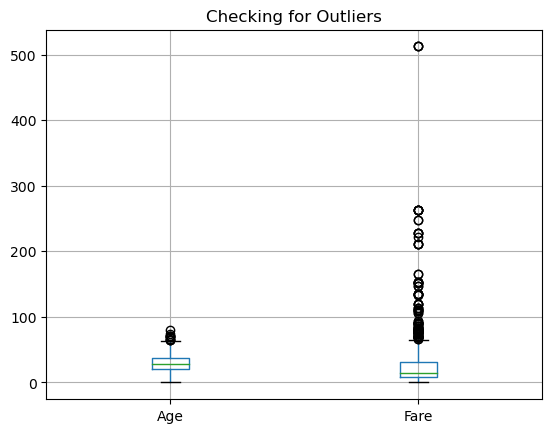

In [12]:
## Outliers

cat_data = ['Age','Fare']

data[cat_data].boxplot()
plt.title('Checking for Outliers')

plt.show()

In [13]:
Q1 = data[cat_data].quantile(0.25)
Q3 = data[cat_data].quantile(0.75)

IQR = Q3-Q1

In [14]:
out_rows = ((data[cat_data]< (Q1-1.5*IQR))|(data[cat_data]>(Q3+1.5*IQR))).any(axis=1)
## There is 126 Observations are outliers out of 891

In [15]:
data = data[~out_rows]

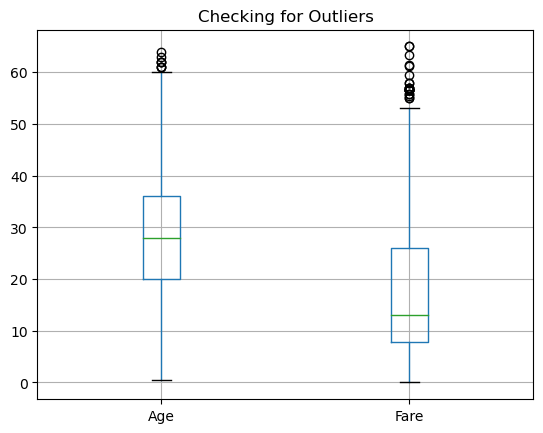

In [16]:
data[cat_data].boxplot()
plt.title('Checking for Outliers')

plt.show()

In [17]:
print(data.columns)
data

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
data.drop('Name', axis =1 ,inplace =True)


In [19]:
data = data.reindex(columns=['Age','Fare','Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked','Survived'])
data.drop('Ticket', axis= 1 ,inplace=True)
data.head(10)

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,22.0,7.2500,3,male,1,0,S,0
2,26.0,7.9250,3,female,0,0,S,1
3,35.0,53.1000,1,female,1,0,S,1
4,35.0,8.0500,3,male,0,0,S,0
5,NaN,8.4583,3,male,0,0,Q,0
6,54.0,51.8625,1,male,0,0,S,0
7,2.0,21.0750,3,male,3,1,S,0
8,27.0,11.1333,3,female,0,2,S,1
9,14.0,30.0708,2,female,1,0,C,1
10,4.0,16.7000,3,female,1,1,S,1


## Exploratory Data Analysis

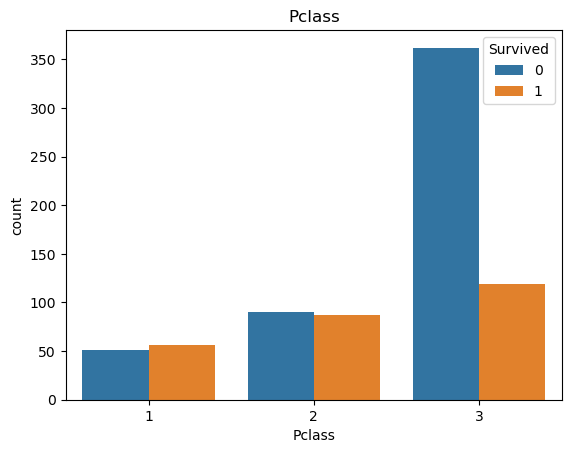

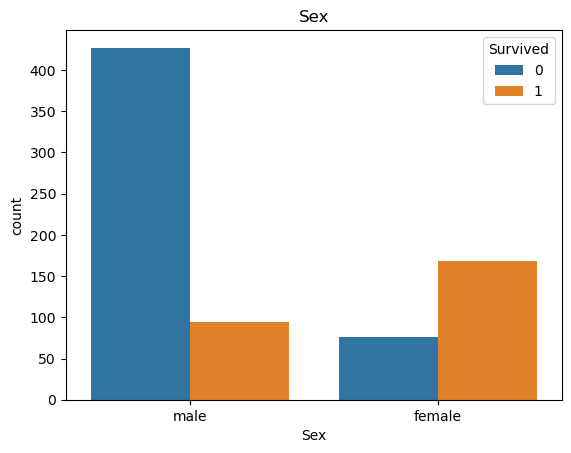

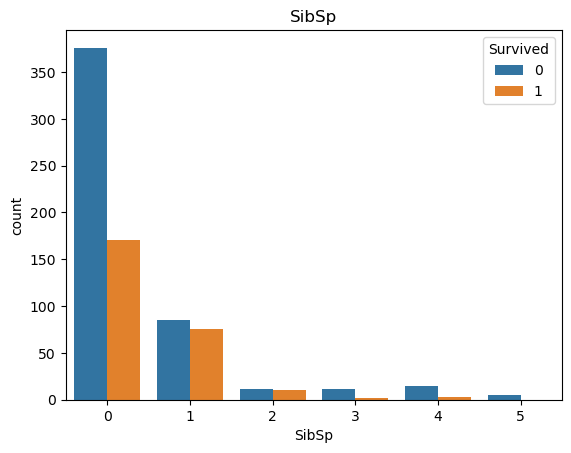

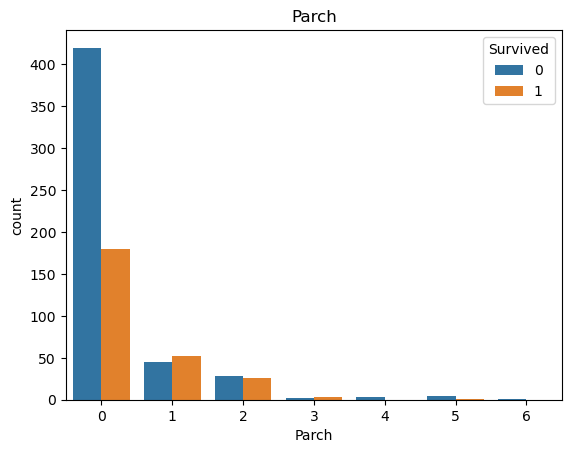

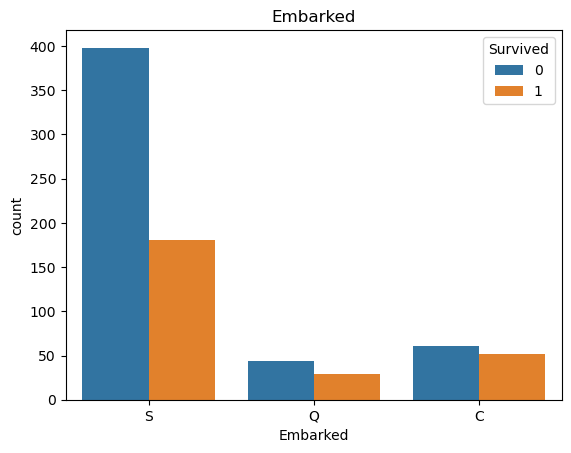

In [25]:
## Category Variables with Survive

catogary = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for cat in catogary:
    sns.countplot(data=data, x =cat ,hue ='Survived' )
    plt.title(cat)
    plt.show()

    
## Categorical Variable has an affect on Survival    

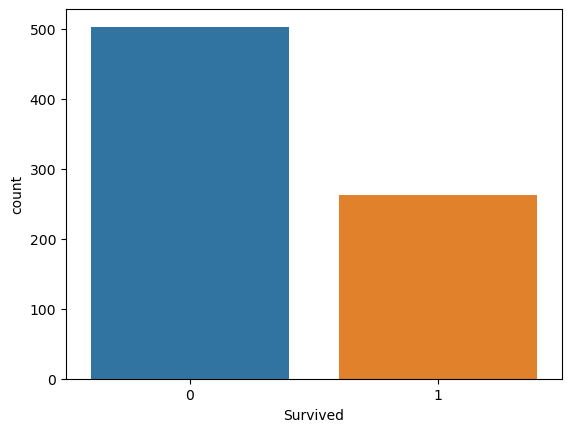

In [26]:
sns.countplot(data=data, x='Survived')

plt.show()

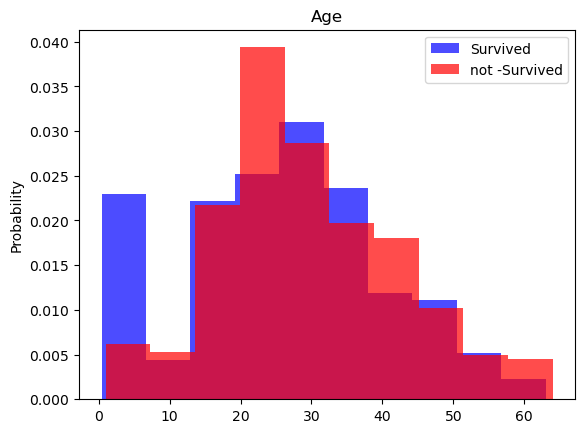

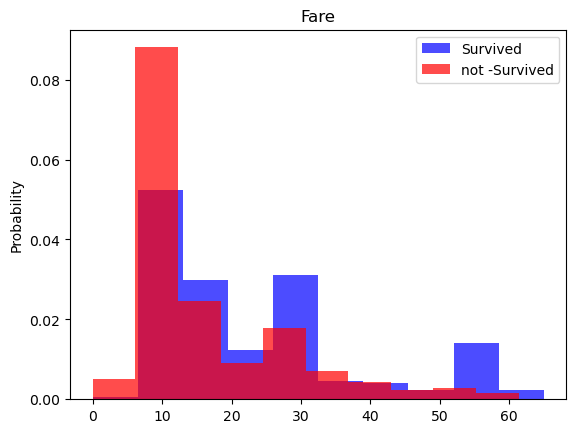

In [41]:
numeric = ['Age', 'Fare']


for num in numeric:
    plt.hist(data[data['Survived']==1][num] ,color ='blue', label ='Survived' ,alpha= 0.7, density =True)
    plt.hist(data[data['Survived']==0][num] ,color ='red',  label ='not -Survived' ,alpha= 0.7, density =True)
    plt.legend()
    plt.title(num)
    plt.ylabel('Probability')
    plt.show()

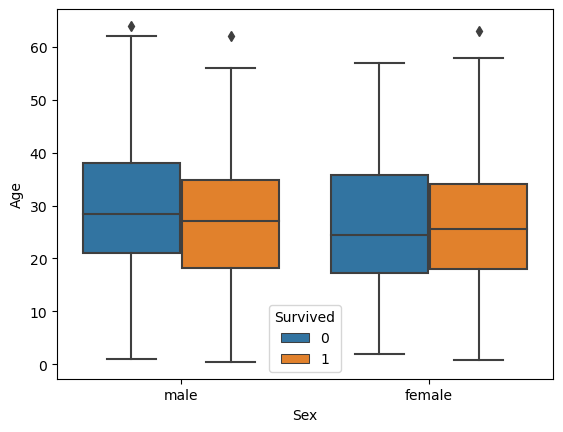

In [44]:
sns.boxplot(data= data , x= 'Sex' , y='Age' ,hue='Survived')

plt.show()

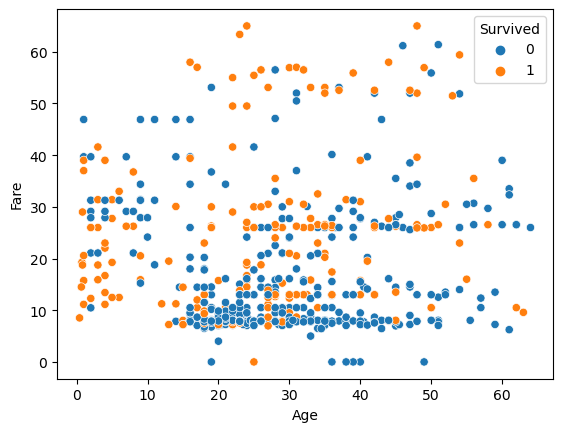

In [46]:
sns.scatterplot(data=data ,x= 'Age'  ,y= 'Fare' ,hue ='Survived')

plt.show()

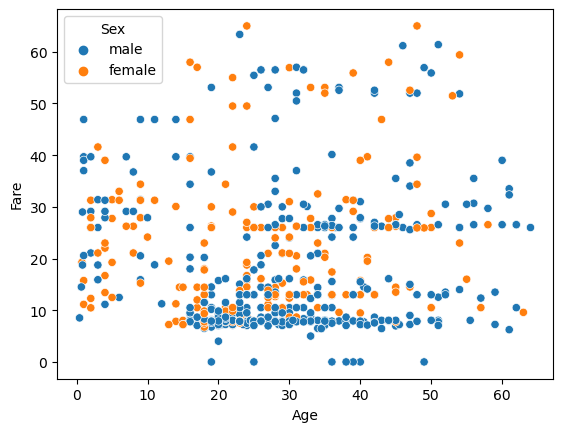

In [47]:
sns.scatterplot(data=data ,x= 'Age'  ,y= 'Fare' ,hue ='Sex')

plt.show()

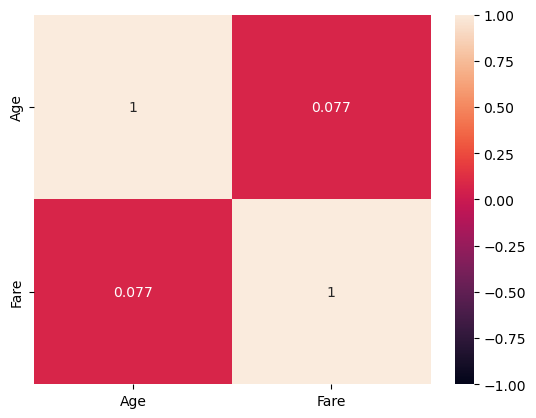

In [63]:
sns.heatmap(data[numeric].corr(),annot=True , vmax= 1 ,vmin =-1)
plt.show()

## Model Building

In [48]:
## Preprocessing
data

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,22.0,7.2500,3,male,1,0,S,0
2,26.0,7.9250,3,female,0,0,S,1
3,35.0,53.1000,1,female,1,0,S,1
4,35.0,8.0500,3,male,0,0,S,0
5,NaN,8.4583,3,male,0,0,Q,0
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,2,male,0,0,S,0
887,19.0,30.0000,1,female,0,0,S,1
888,NaN,23.4500,3,female,1,2,S,0
889,26.0,30.0000,1,male,0,0,C,1


In [50]:
## Encoding

catogary = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for cat in catogary:
    print(data[cat].value_counts())
    print('--------------------------------------------------------------------------------------------------------------------------')
    

3    481
2    177
1    107
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
male      521
female    244
Name: Sex, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
0    547
1    161
2     21
4     18
3     13
5      5
Name: SibSp, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
0    600
1     97
2     54
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
S    579
C    113
Q     73
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------------------------------------------------


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])

In [67]:
data

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,22.0,7.2500,3,1,1,0,S,0
2,26.0,7.9250,3,0,0,0,S,1
3,35.0,53.1000,1,0,1,0,S,1
4,35.0,8.0500,3,1,0,0,S,0
5,NaN,8.4583,3,1,0,0,Q,0
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,2,1,0,0,S,0
887,19.0,30.0000,1,0,0,0,S,1
888,NaN,23.4500,3,0,1,2,S,0
889,26.0,30.0000,1,1,0,0,C,1


In [68]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [78]:
ohe1 = ohe.fit_transform(data['Pclass'].values.reshape(-1,1)).toarray()
ohe1 = ohe1[:,1:].astype(int)
df_1 = pd.DataFrame(ohe1 ,columns =['Pclass_1' ,'Pclass_2'])


In [79]:
ohe2 = ohe.fit_transform(data['SibSp'].values.reshape(-1,1)).toarray()
ohe2 = ohe2[:,1:].astype(int)
df_2 = pd.DataFrame(ohe2 ,columns =['SibSp_1' ,'SibSp_2','SibSp3','SibSp4','SibSp5'])

In [80]:
ohe3 = ohe.fit_transform(data['Parch'].values.reshape(-1,1)).toarray()
ohe3 = ohe3[:,1:].astype(int)
df_3 = pd.DataFrame(ohe3 ,columns =['Parch_1' ,'Parch_2','Parch_3','Parch_4','Parch_5','Parch_6'])

In [81]:
ohe4 = ohe.fit_transform(data['Embarked'].values.reshape(-1,1)).toarray()
ohe4 = ohe4[:,1:].astype(int)
df_4 = pd.DataFrame(ohe4 ,columns =['Embarked_1' ,'Embarked_2'])

In [89]:
Encode = pd.concat([df_1,df_2,df_3,df_4],1)

/tmp/ipykernel_1741/495408548.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Encode = pd.concat([df_1,df_2,df_3,df_4],1)


In [90]:
Encode

,Pclass_1,Pclass_2,SibSp_1,SibSp_2,SibSp3,SibSp4,SibSp5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
762,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
data.reset_index(inplace=True)

In [97]:
data = pd.concat([data,Encode],1)

/tmp/ipykernel_1741/242946065.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data,Encode],1)


In [99]:
data.drop(['Pclass' ,'Sex' , 'SibSp' , 'Parch' ,'Embarked'],axis=1 ,inplace =True)

In [105]:
data.columns
data = data.reindex(columns=['index', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'SibSp_1',
       'SibSp_2', 'SibSp3', 'SibSp4', 'SibSp5', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_1', 'Embarked_2', 'Survived'])

In [107]:
data.drop('index',axis=1 , inplace= True)

In [108]:
data

,Age,Fare,Pclass_1,Pclass_2,SibSp_1,SibSp_2,SibSp3,SibSp4,SibSp5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2,Survived
0,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,NaN,8.4583,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,27.0,13.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
761,19.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
762,NaN,23.4500,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
763,26.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [147]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [132]:
data_2 = pd.read_csv('/kaggle/input/titanic/train.csv')
print(data_2.shape)
data_2


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [149]:
X
Y

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [160]:
print(len(Y))
Y.sum()

765


262

In [159]:
print(len(y_train))
y_train.sum()

612


200

In [163]:
print(len(y_test))
y_test.sum()

153


62

In [129]:
# from sklearn.preprocessing import StandardScaler
# sc =StandardScaler()
# X_train = sc.fit_transform(X_train)

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2 , random_state= 0)


In [ ]:
## SVM 

In [151]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel ='rbf')


In [152]:
svc_classifier.fit(x_train,y_train)

SVC()

In [153]:
svc_predict = svc_classifier.predict(x_test)

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[89  2]
 [53  9]]
0.6405228758169934
              precision    recall  f1-score   support

           0       0.63      0.98      0.76        91
           1       0.82      0.15      0.25        62

    accuracy                           0.64       153
   macro avg       0.72      0.56      0.51       153
weighted avg       0.70      0.64      0.55       153



In [ ]:
## KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=101 ,p=2, metric='minkowski')

knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=101)

In [167]:
knn_predict =knn_classifier.predict(x_test)

In [168]:
print(confusion_matrix(y_test,knn_predict))
print(accuracy_score(y_test,knn_predict))
print(classification_report(y_test,knn_predict))

[[89  2]
 [57  5]]
0.6143790849673203
              precision    recall  f1-score   support

           0       0.61      0.98      0.75        91
           1       0.71      0.08      0.14        62

    accuracy                           0.61       153
   macro avg       0.66      0.53      0.45       153
weighted avg       0.65      0.61      0.51       153



In [ ]:
## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100 , criterion='entropy')

rf_classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [170]:
rf_predict =knn_classifier.predict(x_test)

In [171]:
print(confusion_matrix(y_test,rf_predict))
print(accuracy_score(y_test,rf_predict))
print(classification_report(y_test,rf_predict))

[[89  2]
 [57  5]]
0.6143790849673203
              precision    recall  f1-score   support

           0       0.61      0.98      0.75        91
           1       0.71      0.08      0.14        62

    accuracy                           0.61       153
   macro avg       0.66      0.53      0.45       153
weighted avg       0.65      0.61      0.51       153



In [ ]:
## Voting Classifier

In [181]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()

In [190]:
from sklearn.ensemble import VotingClassifier

T1 = ('Svc',svc_classifier)
T2 = ('KNN',knn_classifier )
T3  =('Random Forest' ,rf_classifier )
T4 = ('Logistic' , lg)

model = VotingClassifier(estimators=[T1,T2,T3] ,voting='hard')

In [191]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('Svc', SVC()),
                             ('KNN', KNeighborsClassifier(n_neighbors=101)),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy'))])

In [192]:
voting_predict = model.predict(x_test)

In [193]:
print(confusion_matrix(y_test,voting_predict))
print(accuracy_score(y_test,voting_predict))
print(classification_report(y_test,voting_predict))

[[90  1]
 [51 11]]
0.6601307189542484
              precision    recall  f1-score   support

           0       0.64      0.99      0.78        91
           1       0.92      0.18      0.30        62

    accuracy                           0.66       153
   macro avg       0.78      0.58      0.54       153
weighted avg       0.75      0.66      0.58       153



In [ ]:
### Building an ANN

In [194]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [195]:
ann =tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [196]:
ann.compile(optimizer='adam' ,loss ='binary_crossentropy',metrics = ['accuracy'])

In [198]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.3118 - accuracy: 0.6895
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7763 - accuracy: 0.6846
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6961
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6961
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6863
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6944
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.6977
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6928
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6961
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.6961
Epoch 11/

In [199]:
ann_predict = model.predict(x_test)

In [200]:
print(confusion_matrix(y_test,ann_predict))
print(accuracy_score(y_test,ann_predict))
print(classification_report(y_test,ann_predict))

[[90  1]
 [51 11]]
0.6601307189542484
              precision    recall  f1-score   support

           0       0.64      0.99      0.78        91
           1       0.92      0.18      0.30        62

    accuracy                           0.66       153
   macro avg       0.78      0.58      0.54       153
weighted avg       0.75      0.66      0.58       153

